# Artificial Neural Networks and Deep Learning

---

## Homework 1: Create new dataset

## 🌐 Connect Colab to Google Drive

In [2]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/My Drive/DeepL/Homework 1/DeepL Team/Submission

Mounted at /gdrive
/gdrive/My Drive/DeepL/Homework 1/DeepL Team/Submission


## ⚙️ Import Libraries

In [3]:
%%capture
pip install keras-cv

In [4]:
# Set seed for reproducibility
seed = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import requests
from io import BytesIO
import cv2
from PIL import Image
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from tensorflow.keras import mixed_precision

import keras_cv
from keras_cv.layers import AugMix, RandAugment

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

2.17.1


## ⏳ Load the Data

In [5]:
data=np.load('../training_set.npz') # Load the training data here
images=data['images']
labels=data['labels']
del data # Free memory

In [6]:
print('Target shape', labels.shape)

# Calculate the unique target labels and their counts
unique, count = np.unique(labels, return_counts=True)
print('Target labels:', unique)
for u in unique:
    print(f'Class {unique[u]} has {count[u]} samples')

Target shape (13759, 1)
Target labels: [0 1 2 3 4 5 6 7]
Class 0 has 1052 samples
Class 1 has 2381 samples
Class 2 has 1285 samples
Class 3 has 2226 samples
Class 4 has 1049 samples
Class 5 has 1393 samples
Class 6 has 2530 samples
Class 7 has 1843 samples


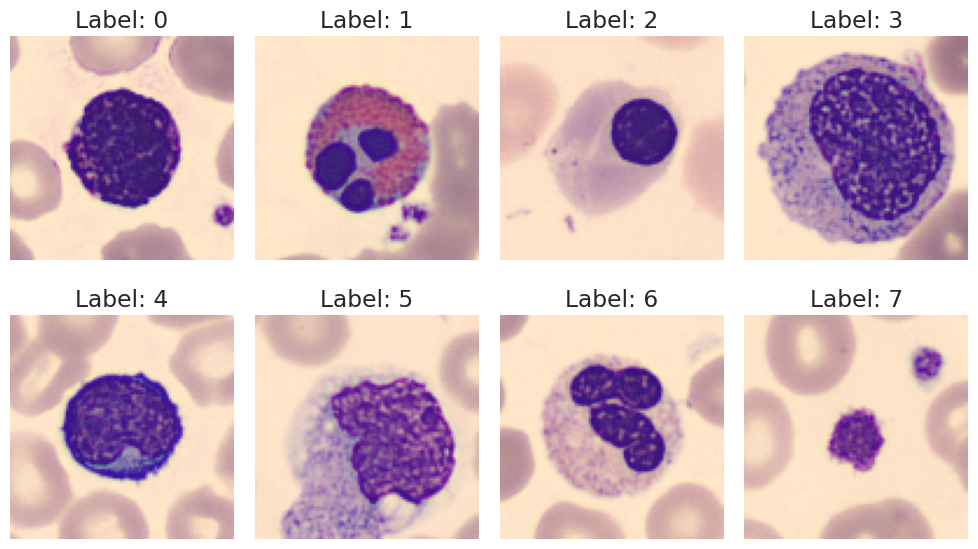

In [7]:
# Display a sample of images from the dataset, one from each class
num_classes = 8 # Number of classes to display
class_indices = []

# Loop through each class and find one image index for that class
for class_label in range(num_classes):
    index = np.where(labels == class_label)[0][0] # Find first occurrence of class
    class_indices.append(index)

# Calculate the number of rows and columns for the subplots
num_cols = 4  # Number of images per row
num_rows = (num_classes + num_cols - 1) // num_cols # Calculate number of rows needed

# Create subplots with specified rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3*num_rows))

# Iterate through the selected class indices
for i, idx in enumerate(class_indices):
    # Calculate row and column index for current image
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]  # Access subplot using row and column indices
    ax.imshow(np.squeeze(images[idx]), vmin=0., vmax=1.)
    ax.set_title(f'Label: {labels[idx][0]}')
    ax.axis('off')

# Adjust layout and display the images
plt.tight_layout()
plt.show()

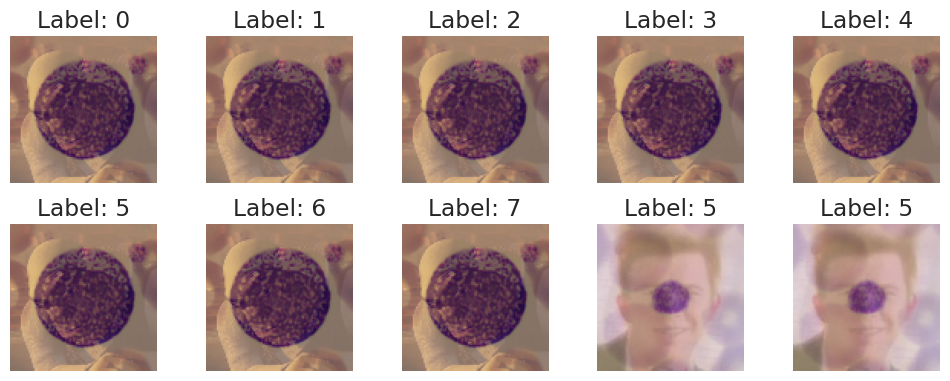

In [8]:
# Display a sample of troll images from the dataset
troll_indices=[11959, 12159, 12359, 12559, 12759, 12959, 13159, 13359, 13559, 13758]

fig, axes = plt.subplots(2, 5, figsize=(10, 4))

# Iterate through the selected number of images
for i, idx in enumerate(troll_indices):
    # Calculate row and column index for current image
    row = i // 5
    col = i % 5
    ax = axes[row, col]  # Access subplot using row and column indices
    ax.imshow(np.squeeze(images[idx]), vmin=0., vmax=1.)
    ax.set_title(f'Label: {labels[idx][0]}')
    ax.axis('off')

# Adjust layout and display the images
plt.tight_layout()
plt.show()

## 📤 Outliers

In [9]:
# Deleting obvious outliers (200 for each class)
images=images[0:11959]
labels=labels[0:11959]

In [10]:
print('Target shape', labels.shape)

# Calculate the unique target labels and their counts
unique, count = np.unique(labels, return_counts=True)
print('Target labels:', unique)
for u in unique:
    print(f'Class {unique[u]} has {count[u]} samples')

Target shape (11959, 1)
Target labels: [0 1 2 3 4 5 6 7]
Class 0 has 852 samples
Class 1 has 2181 samples
Class 2 has 1085 samples
Class 3 has 2026 samples
Class 4 has 849 samples
Class 5 has 993 samples
Class 6 has 2330 samples
Class 7 has 1643 samples


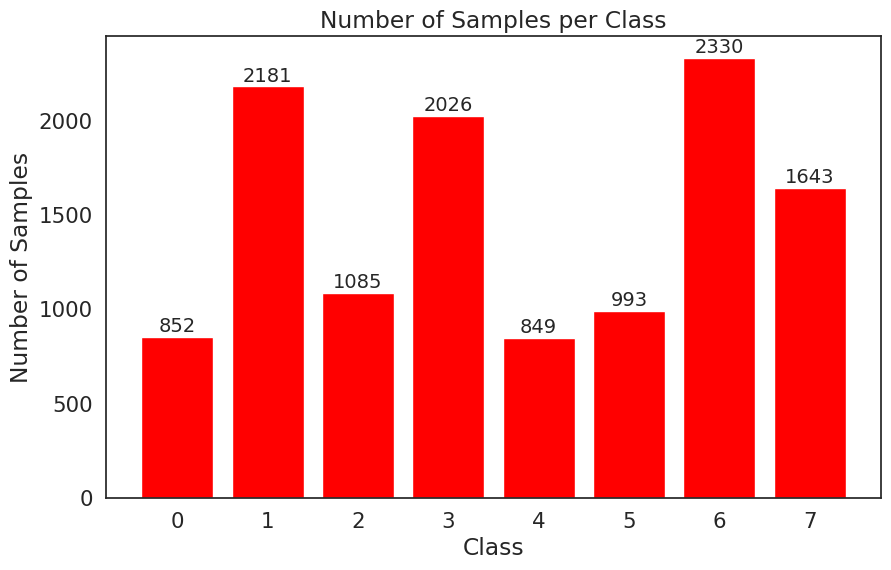

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(unique, count, color='red')
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Number of Samples per Class")
plt.xticks(unique)  # Ensure all class labels are displayed on the x-axis

# Add annotations (number of samples) above each bar
for i, v in enumerate(count):
    plt.text(unique[i], v + 5, str(v), ha='center', va='bottom')

plt.show()

## ➗ Split dataset into training and validation

In [12]:
training_size = 10000
test_size = len(images)-training_size

In [14]:
data_train, data_val, labels_train, labels_val = train_test_split(
    images,
    labels,
    test_size=test_size,
    random_state=seed,
    stratify=labels
)

# Remark: the validation set will be splitted into validation and test set in the other notebooks

# Calculate the unique target labels and their counts for training set
unique, count = np.unique(labels_train, return_counts=True)
print('Training set Target labels:', unique)
for u in unique:
    print(f'Class {unique[u]} has {count[u]} samples')

# Calculate the unique target labels and their counts for validation set
unique, count = np.unique(labels_val, return_counts=True)
print('\nValidation set Target labels:', unique)
for u in unique:
    print(f'Class {unique[u]} has {count[u]} samples')

Training set Target labels: [0 1 2 3 4 5 6 7]
Class 0 has 713 samples
Class 1 has 1824 samples
Class 2 has 907 samples
Class 3 has 1694 samples
Class 4 has 710 samples
Class 5 has 830 samples
Class 6 has 1948 samples
Class 7 has 1374 samples

Validation set Target labels: [0 1 2 3 4 5 6 7]
Class 0 has 139 samples
Class 1 has 357 samples
Class 2 has 178 samples
Class 3 has 332 samples
Class 4 has 139 samples
Class 5 has 163 samples
Class 6 has 382 samples
Class 7 has 269 samples


## 🔁 Replicate images to balance under-populated classes in training set

In [15]:
def balance_classes(images, labels, target_size=2000):
    """Balances classes by replicating images to reach the target size."""
    unique_labels, counts = np.unique(labels, return_counts=True)
    balanced_images = []
    balanced_labels = []

    for label in unique_labels:
        class_indices = np.where(labels == label)[0]
        class_images = images[class_indices]
        num_to_add = target_size - len(class_images)

        if num_to_add > 0:
            # Randomly sample with replacement to reach the target
            indices_to_replicate = np.random.choice(len(class_images), size=num_to_add, replace=True)
            replicated_images = class_images[indices_to_replicate]
            balanced_images.extend(list(class_images) + list(replicated_images))
            balanced_labels.extend([label] * target_size)
        else:
            balanced_images.extend(class_images[:target_size])
            balanced_labels.extend([label] * target_size)

    return np.array(balanced_images), np.array(balanced_labels)


# Example usage (assuming you have data_train and labels_train defined)
balanced_data_train, balanced_labels_train = balance_classes(data_train, labels_train)

del data_train
del labels_train

# Verify class balance
unique, count = np.unique(balanced_labels_train, return_counts=True)
print('Balanced Target labels:', unique)
for u in unique:
    print(f'Class {unique[u]} has {count[u]} samples')

Balanced Target labels: [0 1 2 3 4 5 6 7]
Class 0 has 2000 samples
Class 1 has 2000 samples
Class 2 has 2000 samples
Class 3 has 2000 samples
Class 4 has 2000 samples
Class 5 has 2000 samples
Class 6 has 2000 samples
Class 7 has 2000 samples


## 🖊 Summary

In [16]:
# Convert labels to categorical format using one-hot encoding
balanced_labels_train = tfk.utils.to_categorical(balanced_labels_train)
labels_val = tfk.utils.to_categorical(labels_val)

input_shape = balanced_data_train.shape[1:]
print(f'Input shape of the network:\t {input_shape}')

output_shape = balanced_labels_train.shape[1]
print(f'Output shape of the network:\t {output_shape}')

# Print the shapes of the resulting sets
print('Training set shape:\t', balanced_data_train.shape, balanced_labels_train.shape)
print('Validation set shape:\t', data_val.shape, labels_val.shape)

Input shape of the network:	 (96, 96, 3)
Output shape of the network:	 8
Training set shape:	 (16000, 96, 96, 3) (16000, 8)
Validation set shape:	 (1959, 96, 96, 3) (1959, 8)


## 🖼 Apply Augmentation

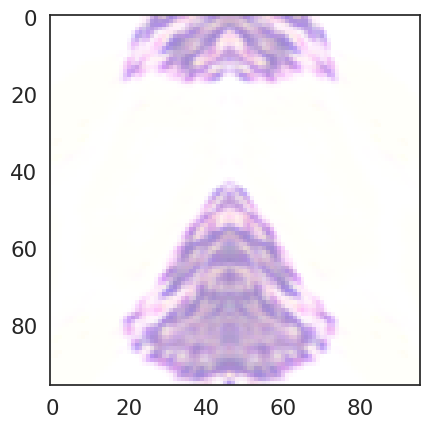

tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0.], shape=(8,), dtype=float64)


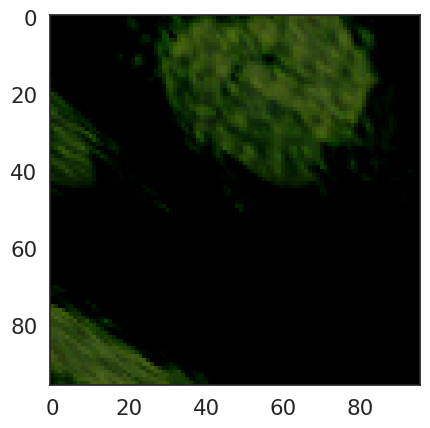

tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0.], shape=(8,), dtype=float64)


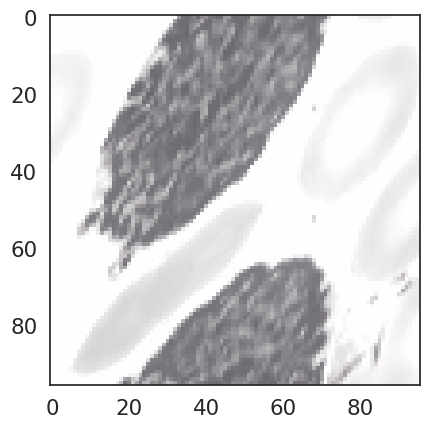

tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0.], shape=(8,), dtype=float64)


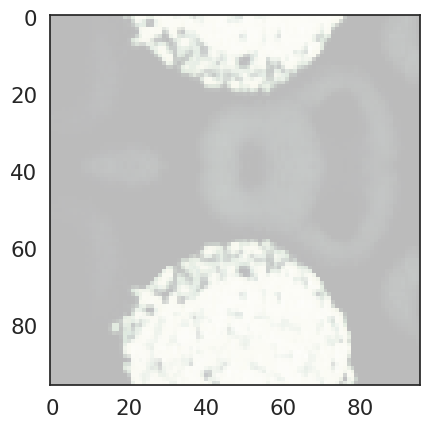

tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0.], shape=(8,), dtype=float64)


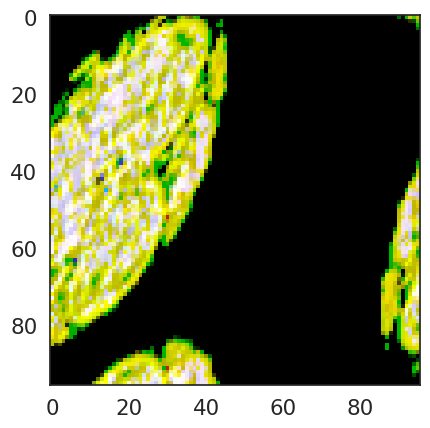

tf.Tensor([1. 0. 0. 0. 0. 0. 0. 0.], shape=(8,), dtype=float64)


In [17]:
# Initialize AugMix and RandAugment layers from keras_cv
augmix = AugMix(
    value_range=(0,255),  # Value range for normalization
    num_chains=4,         # You can adjust the number of mixed augmentations
    severity=0.75,        # Severity of augmentation (range 0-1)
    alpha=1.0             # Alpha blending coefficient for mixing
)

randaugment = RandAugment(
    value_range=[0, 255],        # Value range for normalization
    augmentations_per_image=4,   # Number of random augmentations to apply
    magnitude=0.75                # Magnitude of augmentation (range 0-1)
)

# Create a function to apply both augmentations
def augment_data(X,y):
      X = augmix(X)  # Apply AugMix
      X = randaugment(X)  # Apply RandAugment()
      return X,y


# Example usage on a batch of your training data (data_train)
augmented_X_train = tf.data.Dataset.from_tensor_slices((balanced_data_train, balanced_labels_train))
augmented_X_train = (augmented_X_train.map(lambda x,y: augment_data(x,y), num_parallel_calls=tf.data.AUTOTUNE)
                     .batch(32)
                     .prefetch(tf.data.AUTOTUNE))

for images, labels in augmented_X_train.take(5):
    image=images[0]/255.0
    image=image.numpy().astype(np.float32)
    image=tf.clip_by_value(image, 0, 1)
    plt.imshow(image)
    plt.show()
    print(labels[0])

## 📈 Create augmented training dataset and validation dataset

In [18]:
aug_im=[]
aug_lab=[]

for images, labels in augmented_X_train:
  aug_im.append(images)
  aug_lab.append(labels)

aug_im=np.concatenate(aug_im)
aug_lab=np.concatenate(aug_lab)

In [19]:
print(aug_im.shape)

(16000, 96, 96, 3)


In [20]:
np.savez_compressed('../data_augmented.npz', images=aug_im, labels=aug_lab)
np.savez_compressed('../data_validation.npz', images=data_val, labels=labels_val)